In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import cross_val_score

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# Create dummy variables

In [2]:
df = pd.read_csv('model.csv', index_col=0)

In [4]:
df.head()

,price,proc_cores,proc_speed,mem_type,mem_cap,num_USB,storage_type,storage_cap,graphics,form,brand
0,930,6.0,3.2,ddr4,16.0,8.0,hdd,2048.0,NVIDIA,TOWER,LENOVO
1,1050,6.0,3.2,ddr4,16.0,8.0,hdd,2048.0,NVIDIA,TOWER,LENOVO
2,379,2.0,3.6,ddr4,4.0,8.0,hdd,1024.0,INTEGRATED,TOWER,LENOVO
3,674,4.0,3.1,ddr4,8.0,8.0,ssd,256.0,INTEGRATED,SMALL,DELL
5,823,6.0,3.1,ddr4,16.0,3.0,hdd,1024.0,INTEGRATED,SMALL,DELL


In [5]:
df.reset_index(inplace=True, drop=True)

In [6]:
df.columns.values

array(['price', 'proc_cores', 'proc_speed', 'mem_type', 'mem_cap',
       'num_USB', 'storage_type', 'storage_cap', 'graphics', 'form',
       'brand'], dtype=object)

In [7]:
ram = pd.get_dummies(df['mem_type'])

In [8]:
disk = pd.get_dummies(df['storage_type'])

In [9]:
graph = pd.get_dummies(df['graphics'])

In [10]:
case = pd.get_dummies(df['form'])

In [11]:
br = pd.get_dummies(df['brand'])

In [12]:
df.drop(labels=['mem_type', 'storage_type', 'graphics', 'form', 'brand'], inplace=True, axis=1)

In [13]:
categoricals = pd.concat([ram, disk, graph, case, br], sort=True, axis=1)

In [14]:
df = df.join(categoricals)

In [15]:
df.columns = df.columns.str.lower()

In [16]:
df_viz = df[['price', 'proc_cores', 'proc_speed', 'mem_cap', 'num_usb', 'storage_cap']]

In [18]:
df.to_csv('')

,price,proc_cores,proc_speed,mem_cap,num_usb,storage_cap,ddr2,ddr3,ddr4,hdd,ssd,amd,integrated,nvidia,small,tower,dell,hp,lenovo
0,930,6.0,3.2,16.0,8.0,2048.0,0,0,1,1,0,0,0,1,0,1,0,0,1
1,1050,6.0,3.2,16.0,8.0,2048.0,0,0,1,1,0,0,0,1,0,1,0,0,1
2,379,2.0,3.6,4.0,8.0,1024.0,0,0,1,1,0,0,1,0,0,1,0,0,1
3,674,4.0,3.1,8.0,8.0,256.0,0,0,1,0,1,0,1,0,1,0,1,0,0
4,823,6.0,3.1,16.0,3.0,1024.0,0,0,1,1,0,0,1,0,1,0,1,0,0


## Visualisations

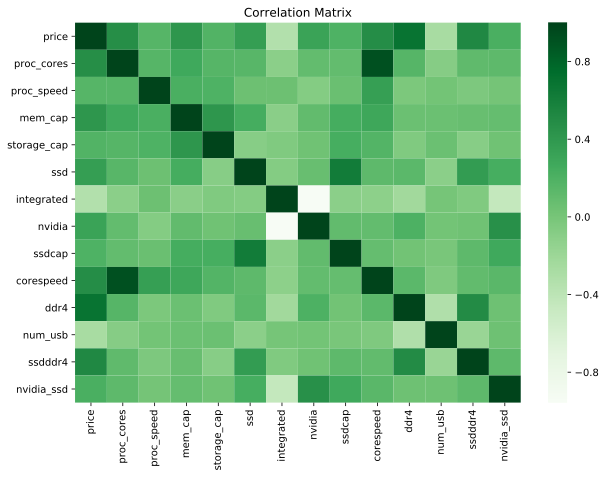

In [1272]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_manip.corr(), cmap='Greens')
plt.title('Correlation Matrix');

In [847]:
from scipy import stats

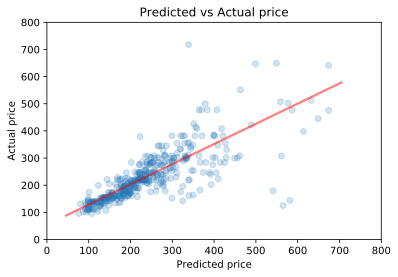

In [1470]:
sns.regplot(yt_log, yp_log, ci=0, scatter_kws={'alpha': 0.2}, line_kws={'color': 'r', 'alpha': 0.5})
plt.xlim([0, 800])
plt.ylim([0, 800])
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Predicted vs Actual price');

In [1473]:
res_log = yt_log - yp_log

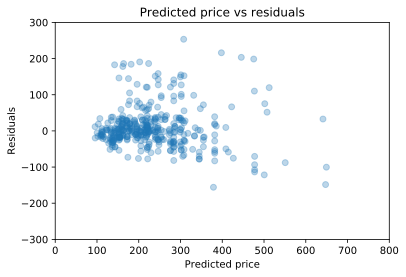

In [1474]:
plt.scatter(yp_log, res_log, alpha=0.3)
plt.xlabel('Predicted price')
plt.ylabel('Residuals')
plt.ylim([-300, 300])
plt.xlim([0, 800])
plt.title('Predicted price vs residuals');

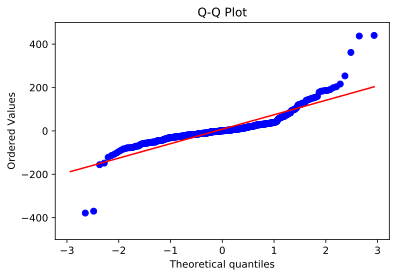

In [1475]:
stats.probplot(res_log, dist='norm', plot=plt)
plt.ylim([-500, 500])
plt.title('Q-Q Plot');

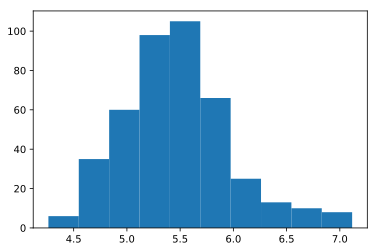

In [1476]:
plt.hist(np.log(y_test));

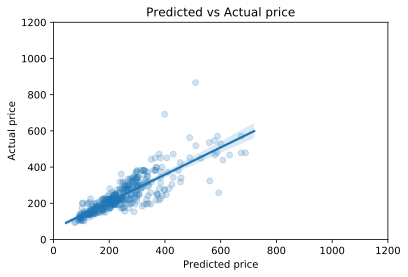

In [1481]:
sns.regplot(yts_sqrt, yps_sqrt, scatter_kws={'alpha': 0.2})
plt.xlim([0, 1200])
plt.ylim([0, 1200])
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Predicted vs Actual price');

In [1485]:
res_sqrt = yts_sqrt - yps_sqrt

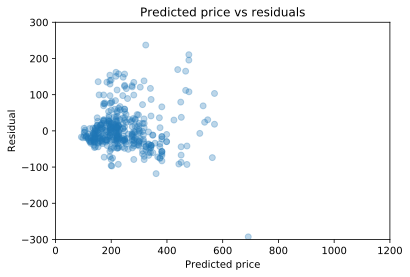

In [1486]:
plt.scatter(yps_sqrt, res_sqrt, alpha=0.3)
plt.xlabel('Predicted price')
plt.ylabel('Residual')
plt.ylim([-300, 300])
plt.xlim([0, 1200])
plt.title('Predicted price vs residuals');

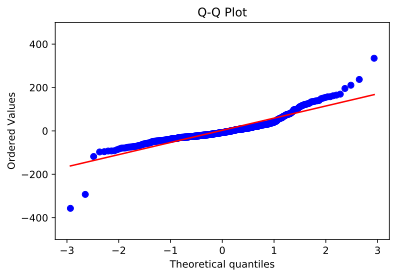

In [1487]:
stats.probplot(res_sqrt, dist='norm', plot=plt)
plt.ylim([-500, 500])
plt.title('Q-Q Plot');

## Modeling

In [1262]:
df_manip.columns.values

array(['price', 'proc_cores', 'proc_speed', 'mem_cap', 'storage_cap',
       'ssd', 'integrated', 'nvidia', 'ssdcap', 'corespeed', 'ddr4',
       'num_usb', 'ssdddr4', 'nvidia_ssd'], dtype=object)

In [873]:
df_manip.drop(labels=['hdd', 'amd', 'small', 'dell', 'ddr2', 'ddr3'], inplace=True, axis=1)

In [801]:
df_manip['nvidia_ssd'] = df_manip['nvidia']*df_manip['ssd']

In [837]:
df_manip.head()

,price,proc_cores,proc_speed,mem_cap,storage_cap,hdd,ssd,amd,integrated,nvidia,...,hp,lenovo,ssdcap,corespeed,ddr2,ddr3,ddr4,num_usb,ssdddr4,nvidia_ssd
0,930,6.0,3.2,16.0,2048.0,1,0,0,0,1,...,0,1,0.0,19.2,0,0,1,8.0,0,0
1,1050,6.0,3.2,16.0,2048.0,1,0,0,0,1,...,0,1,0.0,19.2,0,0,1,8.0,0,0
2,379,2.0,3.6,4.0,1024.0,1,0,0,1,0,...,0,1,0.0,7.2,0,0,1,8.0,0,0
3,674,4.0,3.1,8.0,256.0,0,1,0,1,0,...,0,0,256.0,12.4,0,0,1,8.0,1,0
4,823,6.0,3.1,16.0,1024.0,1,0,0,1,0,...,0,0,0.0,18.6,0,0,1,3.0,0,0


In [778]:
df_manip['proc_cores_exp'] = np.exp(df_manip['proc_cores'])

In [804]:
df_manip.head()

,price,proc_cores,proc_speed,mem_cap,storage_cap,hdd,ssd,amd,integrated,nvidia,...,lenovo,ssdcap,corespeed,ddr2,ddr3,ddr4,num_usb,ssdddr4,proc_cores_exp,nvidia_ssd
0,930,6.0,3.2,16.0,2048.0,1,0,0,0,1,...,1,0.0,19.2,0,0,1,8.0,0,403.428793,0
1,1050,6.0,3.2,16.0,2048.0,1,0,0,0,1,...,1,0.0,19.2,0,0,1,8.0,0,403.428793,0
2,379,2.0,3.6,4.0,1024.0,1,0,0,1,0,...,1,0.0,7.2,0,0,1,8.0,0,7.389056,0
3,674,4.0,3.1,8.0,256.0,0,1,0,1,0,...,0,256.0,12.4,0,0,1,8.0,1,54.598150,0
4,823,6.0,3.1,16.0,1024.0,1,0,0,1,0,...,0,0.0,18.6,0,0,1,3.0,0,403.428793,0


In [301]:
df['ssdcap'] = df['ssd']*df['storage_cap']

In [402]:
df['corespeed'] = df['proc_cores']*df['proc_speed']

In [631]:
df['ssdddr4'] = df['ssd']*df['ddr4']

In [467]:
df_manip = df.copy()

In [1178]:
df_manip = df_backup.copy()

In [1035]:
df_backup = pd.read_csv('df_manip.csv', index_col=0)

In [1458]:
df_no_outliers = df_manip.copy()

In [1459]:
df_no_outliers = df_no_outliers[df_no_outliers['price'] < 700]

In [468]:
df_manip.columns.values

array(['price', 'proc_cores', 'proc_speed', 'mem_cap', 'num_usb',
       'storage_cap', 'ddr2', 'ddr3', 'ddr4', 'hdd', 'ssd', 'amd',
       'integrated', 'nvidia', 'small', 'tower', 'dell', 'hp', 'lenovo',
       'ssdcap', 'corespeed'], dtype=object)

In [935]:
df_manip['corespeed'] = df_manip['corespeed']**2

In [1249]:
df_manip.drop(labels=['tower'], inplace=True, axis=1)

In [632]:
df_manip['ssdddr4'] = df_manip['ssd']*df_manip['ddr4']

In [984]:
df_manip = df_manip[df_manip['price'] < 800]

In [519]:
df_manip.columns.values

array(['price', 'proc_cores', 'proc_speed', 'mem_cap', 'storage_cap',
       'hdd', 'ssd', 'amd', 'integrated', 'nvidia', 'small', 'tower',
       'dell', 'hp', 'lenovo', 'ssdcap', 'corespeed'], dtype=object)

In [1448]:
df_manip.to_csv('df_final.csv')

In [1449]:
df_manip.columns.values

array(['price', 'proc_cores', 'proc_speed', 'mem_cap', 'storage_cap',
       'ssd', 'integrated', 'nvidia', 'ssdcap', 'corespeed', 'ddr4',
       'num_usb', 'ssdddr4', 'nvidia_ssd'], dtype=object)

In [1453]:
df_manip = df_manip.rename({'corespeed': 'corespeed**2'}, axis=1)

In [1456]:
df_manip.drop(labels=['num_usb'], inplace=True, axis=1)

In [1457]:
df_manip.to_csv('df_final.csv')

In [426]:
y = df['price']

In [427]:
X = df.iloc[:, 1:]

In [974]:
def tts(df, d=1):
    y = df['price']
    X = df.iloc[:, 1:]
    
    X_train, X_test, y_train, y_test = train_test_split(X, np.log(y))

    mod = LinearRegression()
    
    pipe = make_pipeline(PolynomialFeatures(d, interaction_only=True), StandardScaler(), mod)

    fit = pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)

    print(f'R^2: {fit.score(X_test, y_test)}')
    print(f'MSE: {mean_squared_error(y_pred, y_test)}')

In [983]:
tts(df_manip, d=1)

R^2: 0.7959864812905717
MSE: 0.042333132475611386


In [1442]:
def cross_val_log(df, degree):
    X = df.iloc[:, 1:]
    y = df['price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, np.log(y))
    
    reg = LinearRegression()

    pipe = make_pipeline(PolynomialFeatures(degree, interaction_only=True), StandardScaler(), reg)
    
    fit = pipe.fit(X_train, y_train)

    scores = cross_val_score(pipe, X_train, y_train, cv=10, scoring='r2')
    mse_scores = cross_val_score(pipe, X_train, np.exp(y_train), cv=10, scoring='neg_mean_squared_error')

    
    train_pred = pipe.predict(X_train)
    
    train_mse = -np.mean(mse_scores)
    
    
    print(f'Cross validated training R^2: {np.mean(scores)}')
    print(f'Cross validated training MSE: {train_mse}')
    #print(f'RMSE: {np.sqrt(np.mean(np.exp(mse_scores)))}')
    
    y_pred = pipe.predict(X_test)
    
    y_pred = np.exp(y_pred)
    y_test = np.exp(y_test)
    
    test_mse = mean_squared_error(y_pred, y_test)
    
    print(f'Test MSE: {test_mse}')
    print(f'Test score: {fit.score(X_test, np.log(y_test))}')
    
    return train_mse, test_mse, y_pred, y_test

In [1440]:
def cross_val_sqrt(df, degree):
    X = df.iloc[:, 1:]
    y = df['price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, np.sqrt(y))
    
    reg = LinearRegression()

    pipe = make_pipeline(PolynomialFeatures(degree, interaction_only=True), StandardScaler(), reg)
    
    fit = pipe.fit(X_train, y_train)

    scores = cross_val_score(pipe, X_train, y_train, cv=10, scoring='r2')
    mse_scores = cross_val_score(pipe, X_train, y_train**2, cv=10, scoring='neg_mean_squared_error')

    
    train_pred = pipe.predict(X_train)
    
    train_mse = -np.mean(mse_scores)
    
    
    print(f'Cross validated training R^2: {np.mean(scores)}')
    print(f'Cross validated training MSE: {train_mse}')
    #print(f'RMSE: {np.sqrt(np.mean(np.exp(mse_scores)))}')
    
    y_pred = pipe.predict(X_test)
    
    y_pred = y_pred**2
    y_test = y_test**2
    
    test_mse = mean_squared_error(y_pred, y_test)
    
    print(f'Test MSE: {test_mse}')
    print(f'Test score: {fit.score(X_test, np.sqrt(y_test))}')
    
    return train_mse, test_mse, y_pred, y_test

In [1468]:
tr_mse, te_mse, yp_log, yt_log = cross_val_log(df_no_outliers, degree=1)

Cross validated training R^2: 0.7495383480886287
Cross validated training MSE: 3231.500754833637
Test MSE: 6089.119022171813
Test score: 0.684698327264528


In [1480]:
tr_mse, te_mse, yps_sqrt, yts_sqrt = cross_val_sqrt(df_no_outliers, degree=1)

Cross validated training R^2: 0.7114782979363745
Cross validated training MSE: 3454.4134600431375
Test MSE: 3613.751343233193
Test score: 0.7443915154767954


In [1429]:
y_pred_log, y_test_log = cross_val_log(df_manip, degree=1)

Cross validated training R^2: 0.7666032571437837
Cross validated training MSE: 5913.238550599628
Test MSE: 6762.9221108803695
Test score: 0.8339220328787651


In [1414]:
y_pred_sqrt, y_test_sqrt = cross_val_sqrt(df_manip, degree=1)

Cross validated training R^2: 0.7911838057340388
Cross validated training MSE: 5098.654139803075
Test MSE: 8302.096759824457
Test score: 0.8146613082502343


In [1291]:
sqrt_mse

array([-3.64188932, -2.74921873, -3.88851765, -8.32770293, -3.29442752,
       -3.67410136, -2.34547776, -3.62263152, -2.70722832, -3.34399459])

## Model finalization

In [1436]:
def finalize_model(df):
    X = df.iloc[:, 1:]
    y = df['price']
    
    y = np.log(y)
    
    reg = LinearRegression()
    
    pipe = make_pipeline(StandardScaler(), reg)
    
    fit = pipe.fit(X, y)
    
    return fit

In [1437]:
final_model = finalize_model(df_manip)

In [1445]:
tr_mse = []
te_mse = []

for _ in range(50):
    train_mse, test_mse, y_pred, y_test = cross_val_log(df_manip, degree=1)
    
    if (train_mse > 20000) or (test_mse > 20000):
        continue
    
    tr_mse.append(train_mse)
    te_mse.append(test_mse)

Cross validated training R^2: 0.788654951260886
Cross validated training MSE: 5916.88005198257
Test MSE: 6681.377241026697
Test score: 0.7816532397395672
Cross validated training R^2: 0.7868100091000018
Cross validated training MSE: 6218.890338204522
Test MSE: 6214.100849166155
Test score: 0.7978490273008393
Cross validated training R^2: 0.7790347437373617
Cross validated training MSE: 5883.582878240033
Test MSE: 6731.73781078755
Test score: 0.787029528603944
Cross validated training R^2: 0.7942491702129274
Cross validated training MSE: 6318.965188639756
Test MSE: 6813.306642930423
Test score: 0.7532490505288347
Cross validated training R^2: 0.7778984761623061
Cross validated training MSE: 5429.400844299834
Test MSE: 9271.49288061569
Test score: 0.792699202439313
Cross validated training R^2: 0.7748053006308933
Cross validated training MSE: 6110.182747979816
Test MSE: 7014.123029324507
Test score: 0.8112881039965045
Cross validated training R^2: 0.7858114102673446
Cross validated train

In [1446]:
np.mean(tr_mse)

6015.604341365627

In [1447]:
np.mean(te_mse)

7047.141669907304

## Regularization

In [375]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [1243]:
def regularization(df, degree, model=RidgeCV):
    #fig, axes = plt.subplots(2, 1, figsize=(7, 10))
    
    X = df.iloc[:, 1:]
    y = df['price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, np.log(y), test_size=0.3)

    mse_train = []
    mse_test = []

    r2_train = []
    r2_test = []

    alphas = [1e-14, 1e-6, 1e-2, .01, 1, 10, 100, 1000]

    scaled_mod = make_pipeline(PolynomialFeatures(degree, interaction_only=True), StandardScaler(),
                               model(alphas=alphas, cv=10))
    scaled_mod.fit(X_train, y_train)

    mse_train = mean_squared_error(y_train, scaled_mod.predict(X_train))
    mse_test = mean_squared_error(y_test, scaled_mod.predict(X_test))

    r2_train = scaled_mod.score(X_train, y_train)
    r2_test = scaled_mod.score(X_test, y_test)
    
    print(f'Training MSE: {mse_train}')
    print(f'Testing MSE: {mse_test}')
    
    print(f'Training R^2: {r2_train}')
    print(f'Testing R^2: {r2_test}')
        
#     axes[0].semilogx(alphas, mse_train,label='train',c='r')
#     axes[0].semilogx(alphas, mse_test,label='test',c='b')
#     axes[0].legend()
#     axes[0].set_xlabel('Alpha')
#     axes[0].set_ylabel('MSE')
#     axes[0].set_ylim([0, 12000])
    
#     axes[1].semilogx(alphas,r2_train,label='train',c='r')
#     axes[1].semilogx(alphas,r2_test,label='test',c='b')
#     axes[1].set_ylim(0,1)
#     axes[1].legend()
#     axes[1].set_xlabel('Alpha')
#     axes[1].set_ylabel('Rˆ2');

In [1244]:
regularization(df_manip, degree=1, model=RidgeCV)

Training MSE: 0.04948503018709791
Testing MSE: 0.05035864895610275
Training R^2: 0.7992809806169051
Testing R^2: 0.7847156300372677


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.499213e-18
  overwrite_a=True).T
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.477231e-18
  overwrite_a=True).T
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.509975e-18
  overwrite_a=True).T
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.559345e-18
  overwrite_a=True).T
/anaconda3/lib/python3.6

In [1222]:
def regularizationCV(df, model=RidgeCV):
    fig, axes = plt.subplots(2, 1, figsize=(7, 10))
    
    X = df.iloc[:, 1:]
    y = df['price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    alphas = [1e-14, 1e-6, 1e-2, .01, 1, 100, 1000]

    
    
    mse_train = []
    mse_test = []
    
    r2_train = []
    r2_test = []
    
    for d in range(1, 4):
        scaled_mod = make_pipeline(PolynomialFeatures(d, interaction_only=True), StandardScaler(),
                                   model(alphas=alphas, cv=10))
        scaled_mod.fit(X_train, y_train)

        mse_train.append(mean_squared_error(y_train, scaled_mod.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, scaled_mod.predict(X_test)))

        r2_train.append(scaled_mod.score(X_train, y_train))
        r2_test.append(scaled_mod.score(X_test, y_test))
        
    axes[0].plot(range(1, 4), mse_train, label='train',c='r')
    axes[0].plot(range(1, 4), mse_test, label='test',c='b')
    axes[0].legend()
    axes[0].set_xlabel('Polynomial Degree')
    axes[0].set_ylabel('MSE')
    axes[0].set_ylim([0, 12000])
    
    axes[1].plot(range(1, 4), r2_train, label='train',c='r')
    axes[1].plot(range(1, 4), r2_test, label='test',c='b')
    axes[1].set_ylim(0,1)
    axes[1].legend()
    axes[1].set_xlabel('Polynomial Degree')
    axes[1].set_ylabel('Rˆ2');

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

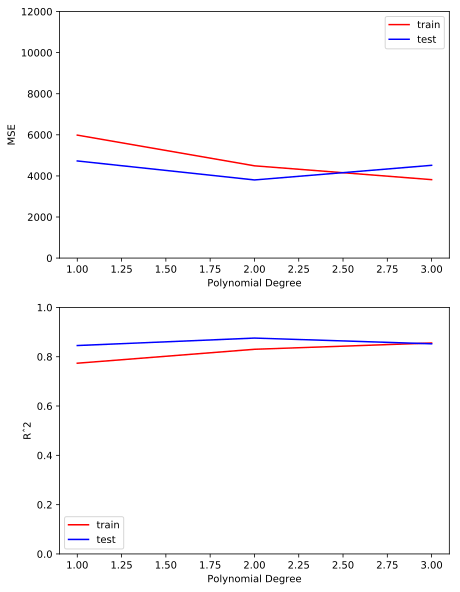

In [1234]:
regularizationCV(df_manip, model=LassoCV)

## Recursive feature elimination

In [315]:
from sklearn.feature_selection import RFECV 

def feature_reduction(X, y, deg=1):
    # Get best features of model using RFECV and make a new prediction using best features
    reg = LinearRegression() 
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    reg.fit(X_train, y_train)
    
    mse_train = mean_squared_error(y_train, reg.predict(X_train))
    mse_test = mean_squared_error(y_test, reg.predict(X_test))
    
    r2_train = reg.score(X_train, y_train)
    r2_test = reg.score(X_test, y_test)
    
    # Check out MSE and R2 of train/test before we do feature reduction
    print('BEFORE FEATURE REDUCTION')
    print(f'Training MSE: {mse_train}\nTesting MSE: {mse_test}\nTraining R2: {r2_train}\nTesting R2: {r2_test}\n')

    # Make RFECV model and fit it
    rfecv = RFECV(estimator=reg, step=1, cv=10, scoring='r2')
    rfecv.fit(X_train, y_train)
    
    
    # Grab only the "best" Xs
    X_new = rfecv.transform(X)
    
    print(f'Reduced features shape: {X_new.shape}\n')
    
    # train test split using our new set of X's
    Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_new, y, test_size=0.3)
    
    pipe = make_pipeline(PolynomialFeatures(deg, interaction_only=True), StandardScaler(), LinearRegression())
    pipe.fit(Xn_train, yn_train)
    
    msen_train = mean_squared_error(yn_train, pipe.predict(Xn_train))
    msen_test = mean_squared_error(yn_test, pipe.predict(Xn_test))
    
    r2n_train = pipe.score(Xn_train, yn_train)
    r2n_test = pipe.score(Xn_test, yn_test)
    
    print('AFTER FEATURE REDUCTION')
    print(f'Training MSE: {msen_train}\nTesting MSE: {msen_test}\nTraining R2: {r2n_train}\nTesting R2: {r2n_test}')
    
    
    sns.regplot(pipe.predict(Xn_test), yn_test, ci=95, line_kws={'color': 'r'}, scatter_kws={'alpha': 0.4})
    plt.legend(('Line of best fit', 'Data'))
    plt.xlim([0, 1500])
    plt.ylim([0, 1500])
    plt.ylabel('Actual price')
    plt.xlabel('Predicted price');
    

BEFORE FEATURE REDUCTION
Training MSE: 6837.071843783757
Testing MSE: 4370.509177456517
Training R2: 0.7708354148771094
Testing R2: 0.806943190513419

Reduced features shape: (1703, 19)

AFTER FEATURE REDUCTION
Training MSE: 6388.545281680925
Testing MSE: 5431.907906508531
Training R2: 0.7822180118082087
Testing R2: 0.772051653080743


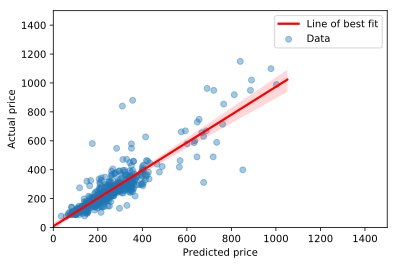

In [316]:
feature_reduction(X, y, deg=1)

In [262]:
score

0.7875677223751015

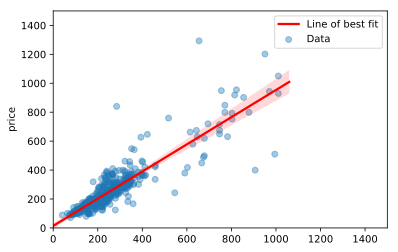

In [263]:
sns.regplot(y_pred, y_test, ci=95, line_kws={'color': 'r'}, scatter_kws={'alpha': 0.4})
plt.legend(('Line of best fit', 'Data'))
plt.xlim([0, 1500])
plt.ylim([0, 1500]);